## Machine learning, statistical models, and preface

Let's start with some definitions. You may remember from last week's statistics tutorial (and previous weeks) that models are built to analyse some data. You may also remember that usually models can be built for predictive tasks using **regression** techniques. To spare you from some of the scarier math, this is similar to solving a line of best fit equation, $$y=mx+c$$
where you want to know what the relationship is between $x$ and some outcome $y$. This usually involves finding the $m$ and $c$ that minimise some error function, namely the least squares equation (this is done by taking the sum of the error squared) which represents figuring out the coefficients that minimise the error between the observed outcome $y$ and predicted outcome given by $mx + c$. 
This idea can be extended to multiple predictors, outcomes, and generalised to answer different types of questions. These are well established concepts in statistics and statistical modelling. You'll probably remember most of this from the previous few weeks.

## Where does machine learning come in?

The term machine learning refers to models built wherein the computer is not explicitly programmed to carry out some task, and instead can 'learn' to perform that task. In one sense, this set of approaches is not dissimilar from statistical modelling and regression-- the computer and model has not been explicitly programmed to learn what the best coefficients are for some arbitrary equation. It follows a set of mathematical instructions to arrive at an answer, and this is true of many other models that fall under the term machine learning. The main difference between statistics and machine learning appears to be the cultures surrounding the 2 sets of approaches (although even making that distinction is more of a formality than a clear split). See these two links (https://stats.stackexchange.com/questions/268755/when-should-linear-regression-be-called-machine-learning and https://stats.stackexchange.com/questions/6/the-two-cultures-statistics-vs-machine-learning) for a primer on this argument and the differences between the fields. 


In reality, the models presented in this tutorial can be considered either flatly regression or extensions of regression techniques, whereby a set of mathematical operations are followed to arrive at the answer for some task. This is a controversial definition but the scope of this week is not to get into the semantics of this definition too much, as many smart people have spent a lot of time arguing about this and have still not arrived at conclusions in some parts of Twitter. 


## A note on this week's material

Whatever you want to call this tutorial, there is too much machine learning / statistical modelling to fit into a single tutorial. Furthermore, people who specialise in numerate fields can spend a good deal of their research careers trying to get their heads around different model assumptions and still end up using models in the wrong way or on the wrong data or questionably interpreting the results. This tutorial should serve as an introduciton to some fun modelling techniques, and will also cover general good modelling practices (so that means not everything here will be based on machine learning). 

**If you want to incorporate some of this material into work of your own for publication, I would strongly suggest you consult with your institute's statistics department for advice before proceeding. This week will give you a good start on what the right questions are to ask and hopefully will ensure you have a good start on general data analysis techniques**. 


## Clustering in n-dimensions

When you begin to work on some data, you might be interested in how data seperates. As you may have seen in previous weeks, you can have a look at this nicely with some scatterplots. Take the iris data below and look at how it seperates in 2 dimensions along sepal length and sepal width. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.style as mpl
import seaborn as sns
import pandas as pd
%matplotlib inline
mpl.use(['fast'])

np.random.seed(42)


iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

np.unique(iris['species'].values)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [2]:
colours=[]
for i in iris['species']:
    if str(i)=='setosa':
        colours.append('red')
    elif str(i)=='versicolor':
        colours.append('blue')
    else:
        colours.append('green')
#for i in iris['species']:
len(colours)

150

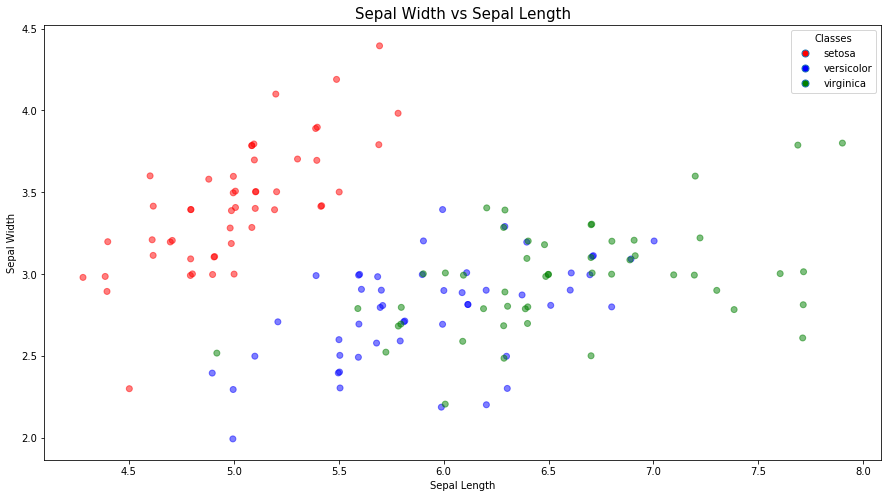

In [3]:
# labels for groups 

#labels=np.zeros([40])
#labels[20:]=1


# colours for labels 
colours=[]
for i in iris['species']:
    if str(i)=='setosa':
        colours.append('red')
    elif str(i)=='versicolor':
        colours.append('blue')
    else:
        colours.append('green')
        
# create plot         
fig,ax=plt.subplots(figsize=(15,8))

noise=np.random.normal(0,0.01,[150]) # for jitter 

sc=ax.scatter(iris['sepal_length'].values+noise,
              iris['sepal_width'].values+noise,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='setosa',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='versicolor', linestyle='None',
                          markerfacecolor='blue', markersize=7),
            Line2D([0], [0], marker='o', label='virginica', linestyle='None',
                          markerfacecolor='green', markersize=7)]
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('Sepal Width vs Sepal Length',fontsize=15)


Here, we can see how the groups seperate at least between 2 species. What if we added a third dimension - ie a third vairable of measurement for the groups? Let's try petal length.  

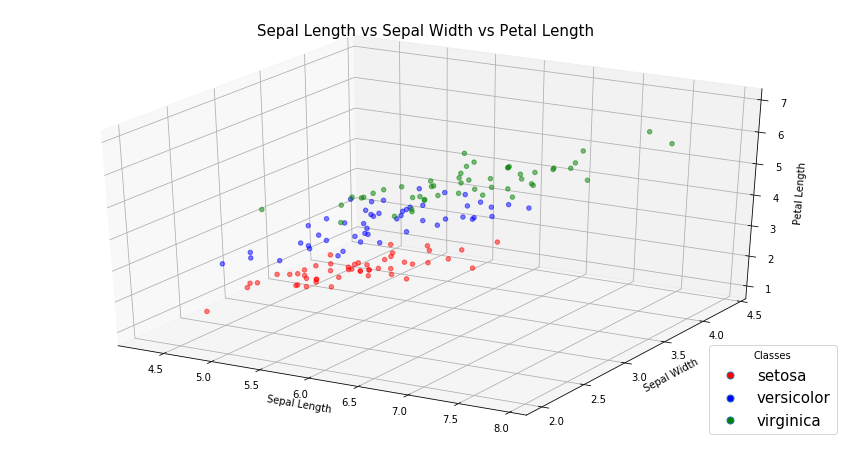

In [4]:

# import this for 3d plotting 
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(15,8))

ax=fig.add_subplot(projection='3d') # specify for 3d


sc=ax.scatter(iris['sepal_length'].values+noise,
              iris['sepal_width'].values+noise,
              iris['petal_length'].values+noise,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='setosa',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='versicolor', linestyle='None',
                          markerfacecolor='blue', markersize=7),
            Line2D([0], [0], marker='o', label='virginica', linestyle='None',
                          markerfacecolor='green', markersize=7)]
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend(handles=legend_item,
                       loc='lower right',title='Classes',fontsize=15)
_=ax.set_title('Sepal Length vs Sepal Width vs Petal Length',fontsize=15)


Again, this is fine - but often our data does not fit neatly into 3 dimensions. This is where dimensionality reduciton techniques come in. Strictly speaking, the technique presented here is called Principal Component Analysis. 

## Principal Component Analysis (PCA)

This is a method of projecting high dimensional data onto a lower dimensional plane. The intuition behind this method lies in some scary linear algebra and decomposition, so I will keep this definition relatively high level. 

For every matrix, there exists a set of values that have unique properties in describing the variation captured in a dataset. These values are called eigenvalues (or principal components), and they represent the amount of variation explained along a certain number of perpendicular or orthoganal axes. The maximum number of components for any given dataset will be the minimum number from the choice $(n-1,m)$ where $n$ and $m$ are rows and columns respectively. The properties of these unique eigenvalues is that they represent a standardised linear combination of variables that contribute to the variablity in a dataset. Thus, if we can solve for them, we can transform the original data that may be in some n-dimensional space into a lower dimension by retaining most of the variance in the data using these principal components. 
We scale the original data by using the eigenvalue information, and the result we get back will be a series of transformed variables projected onto a new coordinate space designed to maximally represent variation in a lower dimension. Each new component, due to the formula of this procedure, will attempt to explain the maximum amount of variance across each direction it is concerned with, so usually the top 2 or 3 pricinipal components are taken. 

### Significance

This is very useful, as we can now start plotting data that contains meaningful information about the 

Briefly, this can be caluclated through mean centering data around zero and finding the line of best fit that maximises the sum of squares of the distance to the center of the data from the projected points. If this is confusing, I highly recommend this video which is about a 20 minutes watch and really describes the essence of this procedure very well (https://www.youtube.com/watch?v=FgakZw6K1QQ). 


For a simple example, we can already see from the previous plot how the data appears to be more variable across petal length than any other variable (this is the intuition behind PCA - find the principal components that capture this variability in a lower dimensional space). Let's try performing PCA to visualise in 4 dimensions and see how the groups seperate. While the procedure sounds complicated, thankfully there is a library in Python that takes care of all the nasty parts.


In [5]:
# it is important to standardise data before feeding it to this PCA function - this essentially means everything
# is zero mean centered as mentioned above
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(iris.drop('species',axis=1)) # just the numbers 
iris_standardised=scaler.transform(iris.drop('species',axis=1)) # create standardised dataset


pca=PCA(n_components=3) # let's reduce our 4 dimensional original dataset into a 3 dimensional object


pca.fit(iris_standardised)


PCA(n_components=3)

One very nice thing about PCA is that you can now check (from our pca object that has been fit to our data) what the percentage explained variance is in the dataset by each of the principal components we would like to fit. 


In [6]:
print(pca.explained_variance_ratio_)
# the first PC explained 72 percent of the variance, and so on... 



[0.72962445 0.22850762 0.03668922]


By plotting the first 2 principal components of every transformed data point, we will explain (72 percent for PC1, 22 percent for PC2) 94 percent of the total variance in the dataset. That is an amazing preservation of information despite losing 2 dimensions. 


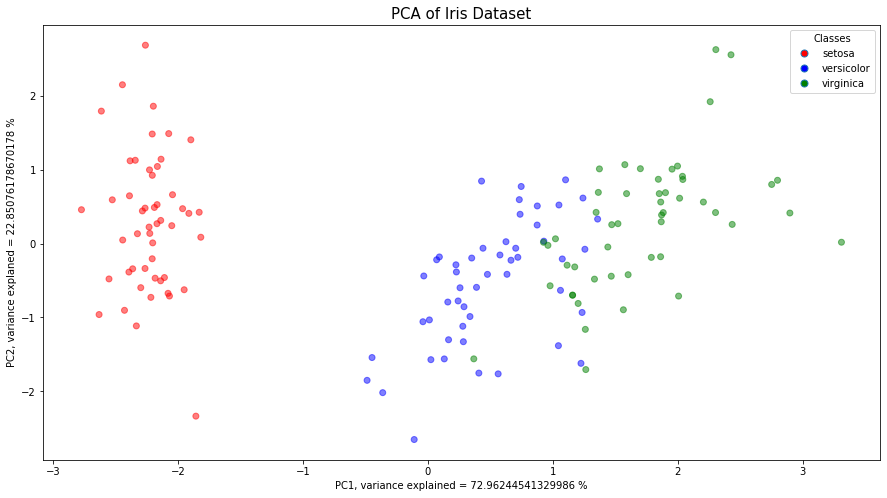

In [7]:
pca_df=pca.transform(iris_standardised)
PC1=pca_df[:,0]
PC2=pca_df[:,1]


# now plot again
fig,ax=plt.subplots(figsize=(15,8))

sc=ax.scatter(PC1,PC2,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='setosa',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='versicolor', linestyle='None',
                          markerfacecolor='blue', markersize=7),
            Line2D([0], [0], marker='o', label='virginica', linestyle='None',
                          markerfacecolor='green', markersize=7)]
ax.set_xlabel(f'PC1, variance explained = {pca.explained_variance_ratio_[0]*100} %')
ax.set_ylabel(f'PC2, variance explaned = {pca.explained_variance_ratio_[1]*100} %')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('PCA of Iris Dataset',fontsize=15)


And the same in 3D...

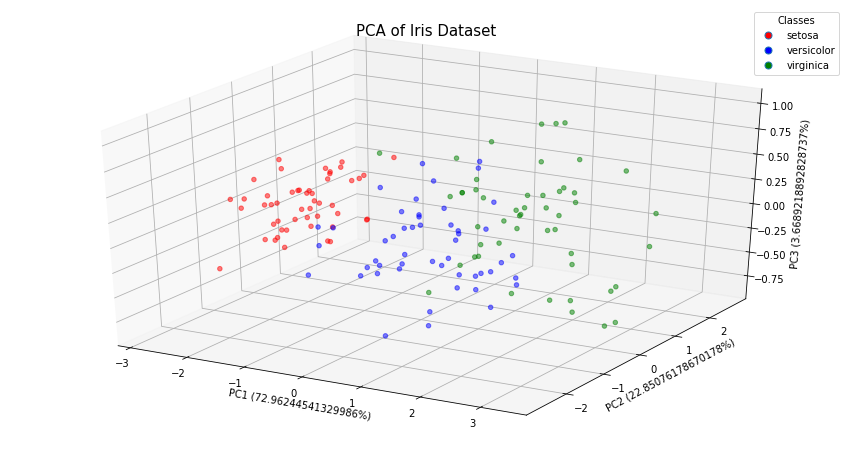

In [8]:

PC3=pca_df[:,2]

from mpl_toolkits.mplot3d import Axes3D
# now plot again
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(projection='3d')

sc=ax.scatter(PC1,PC2,PC3,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='setosa',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='versicolor', linestyle='None',
                          markerfacecolor='blue', markersize=7),
            Line2D([0], [0], marker='o', label='virginica', linestyle='None',
                          markerfacecolor='green', markersize=7)]
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100}%)')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('PCA of Iris Dataset',fontsize=15)


This was a useful excercise, but it becomes very useful when we start considering larger datasets with more variables. Let's use a different example - a little closer to life science.

### Dataset

We will be working with a subset of transcripts from a microarray expression experiment seeking to characterise differences between stable kidney graft transplant and kidney graft transplant rejection. If we just recieved this data we might want to do some basic visualisation. However we can quickly see the problem in our previous approaches if we have a look at the dimensionality of the sample.

In [9]:
import pandas as pd 

df=pd.read_csv("subset_microarray.csv",sep=",",index_col=0)

df.shape


(530, 501)

That's 500 (500 probes - 1 case label) probe measurements per 530 samples. We can't really do anything meaningful here by way of visualisation unless we employ some dimensionality reduction. This can help us visualise the potential clusters of data that exist. 

In [10]:
labels=df['labels'].values
data=df.drop('labels',axis=1)
pca=PCA(n_components=3)

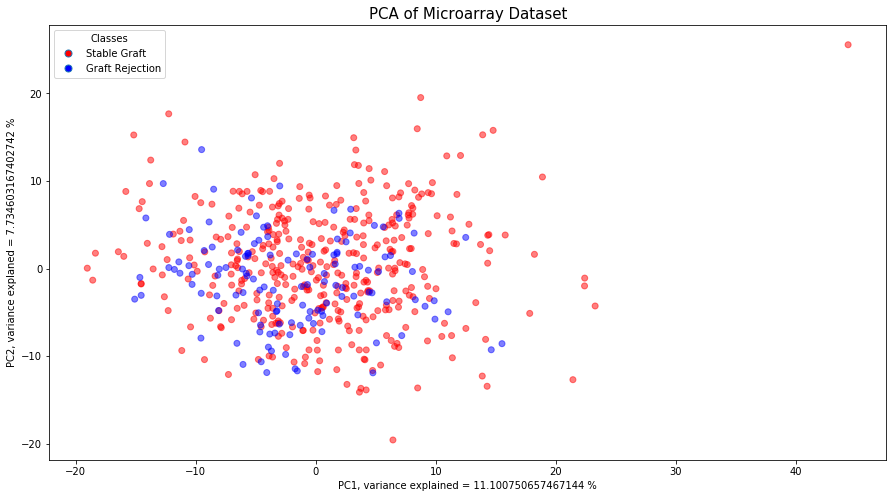

In [11]:
# standardise
scaler=StandardScaler()

scaler.fit(data) # just the numbers 
df_standardised=scaler.transform(data) # create standardised dataset

pca=PCA(n_components=3) 

pca.fit(df_standardised)
                               
pca_df=pca.transform(df_standardised)
PC1=pca_df[:,0]
PC2=pca_df[:,1]

colours=[]
for i in labels:
    if int(i)==0:
        colours.append('red')
    elif int(i)==1:
        colours.append('blue')

# now plot again
fig,ax=plt.subplots(figsize=(15,8))

sc=ax.scatter(PC1,PC2,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='Stable Graft',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='Graft Rejection', linestyle='None',
                          markerfacecolor='blue', markersize=7)]
ax.set_xlabel(f'PC1, variance explained = {pca.explained_variance_ratio_[0]*100} %')
ax.set_ylabel(f'PC2, variance explaned = {pca.explained_variance_ratio_[1]*100} %')
ax.legend(handles=legend_item,
                           loc='upper left',title='Classes',fontsize=10)
_=ax.set_title('PCA of Microarray Dataset',fontsize=15)

And again in 3D...

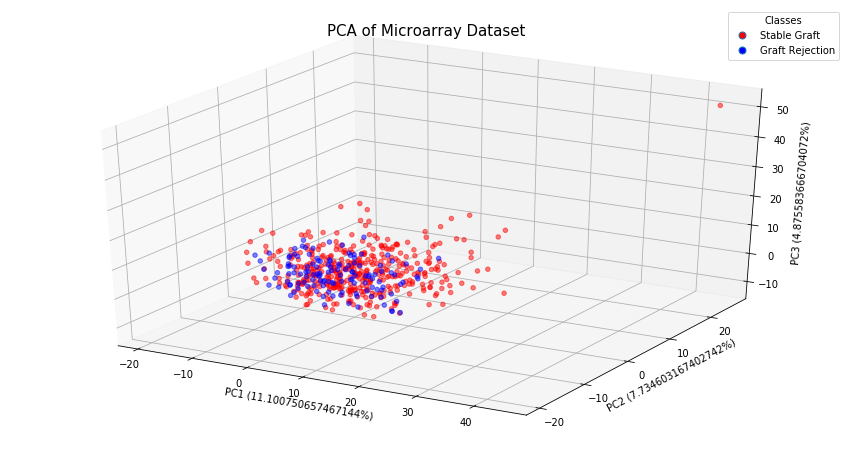

In [12]:
PC3=pca_df[:,2]
# now plot again
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(projection='3d')

sc=ax.scatter(PC1,PC2,PC3,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='Stable Graft',linestyle='None',
                          markerfacecolor='red', markersize=7),
            Line2D([0], [0], marker='o', label='Graft Rejection', linestyle='None',
                          markerfacecolor='blue', markersize=7)]
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100}%)')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('PCA of Microarray Dataset',fontsize=15)

The cases and controls don't really split apart that well, but there is some separation. Furthermore, we can spot the outlier in the stable graft group and effectively visualise the spread of data in an otherwise very high dimensional dataset. This really illustrates the power of using PCA. 


### Building some models

Say we take our high dimensional dataset and want to try and construct a model that will differentiate one condition from another. Standard linear regression, as you will have covered last week, won't give us back exactly what we want - we want the probability that a new patient who walks in off the street will undergo graft rejection or not. This is where the first model comes in - logistic regression

### Logistic regression 


Essentially, logistic regression attempts to take the base linear model and apply a transformation to it that allows you to measure the probability of a binary variable. This is typically expressed as a **link function**, specifically expressing the probability of a particular outcome of interest through modelling the log odds of an event.  
The formula is related to the odds of an event occurring: 
$$Odds(event) = \frac{P(event)}{1-P(event)}$$ 
Where the odds refers to how many more of one event occurs than another. The link function used here essentially models the log of this formula, whereby various coefficients are estimated that contribute to the log odds, which is related to the probability of the event. The probability of an event can be recovered from this formula through some derivations of various formulae (not pictured), leaving us with the following: 
$$P=\frac{1}{1 + e^{-(\beta_{0}+\beta_{1}x)}}$$

The actual maths for recovering the coefficients of an arbitrarally complex model are beyond the scope of this week so they are excluded. 
The main point of this is that it allows you to fit a regression model and estimate the weighting of certain variables in their contribution to the outcome. We can try applying it first to the iris dataset to get a feel for what to expect. Because this is built for binary classification, let's take the second 2 species as our predicted outcomes.
An important part to remember about this is that the result will be in **log odds**, which can be converted back to normal odds using the following rule:
$$Odds=e^{log(Odds)}$$
This will help us in our interpretation of the outcome. 


In [14]:
import statsmodels.api as sm
filt_data = iris[iris['species']!='setosa'] # filter function the same as before 

Y = filt_data['species'].values # our response variable
X = filt_data.drop(['species'],axis=1) # our data to fit without the label
X = sm.add_constant(X) # we add this constant to have an intercept column
for i in range(len(Y)): # convert to ones or zeroes 
    if Y[i]=='versicolor':
        Y[i]=1
    else:
        Y[i]=0

        
Y=np.array(Y).astype('int')# just making sure the type of object is correct

# now we can fit our model 

model=sm.Logit(Y,X) # declare model
res=model.fit() # fit the model and save the results to a vector 

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


/home/shane/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/home/shane/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [124]:
# we could also write it like this with r-like formulas
import statsmodels.formula.api as smf
const_data_form=filt_data # just a copy of the original 
const_data_form['species']=Y # populate the species vector 
res_formula=smf.logit(formula='species ~ sepal_length + sepal_width + petal_length + petal_width', 
                      data=const_data_form).fit() # notice how we can now just declare what variables we want to 
## include - this is really handy and this will be useful for your worksheet! 

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


/home/shane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


While we won't be taking a deep dive into the maths of this approach, it is necessary to appreciate how much is going on in the background here. That chunk of code, specifically the `Logit` and `Logit.fit()` part is taking the data, estimating the weighted contributions of each variables, evaluating a cost function, using the distance from the estimated weighted contributions from the observed output to update the weights and returning the entire model upon convergence (after a certain number of iterations). This is a seriously powerful bit of maths and modelling. The current function value part of the output above refers to the loss upon convergence - it will differ depending on what method you want to use to optimise the function. 


### Interpretation

Now that we have our results object, we can appreciate the complexity of the above operation (by which I mean it returns a lot of information). One thing that is nice about logistic regression in contrast to certain other 'machine learning' models is that you can extract a lot of different information in the summary. Let's have a look at this results object. 


(a note - the pseudo R squared refers to $$1-\frac{log(l_{alt})}{log(l_{null})}$$, and essentially represents the variance in the outcome explained by the predictors, although it is not the same as a true $R^{2}$ due to the nonlinearity of logistic regression) 



In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 May 2020   Pseudo R-squ.:                  0.9142
Time:                        15:07:06   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6378     25.708      1.659      0.097      -7.748      93.024
sepal_length     2.4652      2.394      1.030      0.303      -2.228       7.158
sepal_width      6.6809      4.480      1.491      0.136      -2.099      15.461
petal_length    -9.4294      4.737     -1.990      0.047     -18.714      -0.145
petal_width    -18.2861      9.743     -1.877      0.061     -37.381       0.809
================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

That is a comprehensive amount of information. The intercept here is the mean value of $Y$ when $X=0$ - but remember, everything in the **coef** is in units of **log odds**. This means that a unit increase in any one of these variables leads to a corresponding **coef** column difference in log odds in the outcome. We can recover the odds ratio by taking the exponent ($e^{coef_{i}}$) of whatever variable we are interested in. 


In [16]:
# for example, sepal length...
np.exp(res.params[1])

11.766072699331168

This is the odds ratio given by a unit increase in sepal length corresponding to the change in the odds ratio of the outcome, which is what species a plant is. This roughly translates to being 11 times more likely to be versicolor as your sepal length increases. However, note the **standard error** of this estimate -  it is really high! Using the standard error, we can get a **confidence interval**, which expresses the model's uncertainty in the form of a cedible range of values a parameter can take on. We notice that in the output, we have `[0.025],[0.975]` outputs, corresponding to a 95% credible interval. This is obtained from $$\bar{x} \pm 1.96se$$ which assumes that 95 percent of a normal distribution of points is covered by approximately 1.96 standard deviations on one side or the other of the mean. The standard error differs from the standard deviation in that it represents the variance of a sampling distribution as opposed to a population distribution. We can show this formula is equal to the results above here: 

In [17]:
print(f'upper bound = {res.params[1] + 1.96 * res.bse[1]}')
print(f'lower bound = {res.params[1] - 1.96 * res.bse[1]}')

upper bound = 7.158050191515463
lower bound = -2.2276098011421412


So in essence, the log odds ratio could be as low as -2.272 or as high as 7.158. That would give the following possibilities: 

In [18]:
print(np.exp(-2.2276098011421412))
print(np.exp(7.158050191515463))

0.1077857518692419
1284.4041477197513


Which means these numbers represent how much more likely a flower is to be a different species based on a unit change in sepal length. As you can probably guess, this is not a very good predictor. This is further evidenced by the **z score**, which is the coefficient in log odds divided by the standard error of that coefficient.

In [19]:
res.params[1] / res.bse[1]

1.0296199918483717

This is essentially a standardised regression coefficient, whose value is then used to infer the p-value of a given predictor. P-values are very controversial and shouldn't be trusted as the be all end all of statistics or modelling - suffice to say they are important in their own right. It will tell you here for instance, whether the z score computed from the regression coefficient is unusual for the given data if the null hypothesis (taken to be that there is no effect of this predictor on the outcome) is true. It is specifically a measure of just how unusual the data is if the null is true, so the smaller the p-value the more unusual. 


### A small note on marginal effects

This is all very good, but you may have noticed that this is difficult to interpret on the scales we have calculated everything on - this is a result of the non-linearity we impose through the logistic function transforming the linear model. We can try and get each variables respective effects on the percentage change in the **probability** of an outcome by getting the marginal effects of a model. The maths of this is rooted in calculating derivatives which luckily for me is also outside the scope of this tutorial. The interpretation here however is better, but not as straightforward - it will tell you what the **average** effect a small increase in a continous variable of choice will have on the predicted outcome probability. This can get us a little closer to what we want to say from the model, such as in the table below:

In [20]:
res.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal_length     0.0445      0.038      1.163      0.245      -0.031       0.120
sepal_width      0.1207      0.064      1.891      0.059      -0.004       0.246
petal_length    -0.1703      0.057     -2.965      0.003      -0.283      -0.058
petal_width     -0.3303      0.110     -2.998      0.003      -0.546      -0.114
================================================================================
"""

This means that for a relatively small increase in say Petal Length, there is approximately a -33 percent drop in the probability of the plant species being versicolor. This is pretty cool - we can start saying some interesting things with this approach.  

### Model Visualisation


Great - we have built a model. Let's try to plot what the probability looks like for each instance. This is easier to do with just single variables at a time, so let's see how the sepal length changes the probability

Optimization terminated successfully.
         Current function value: 0.552733
         Iterations 6


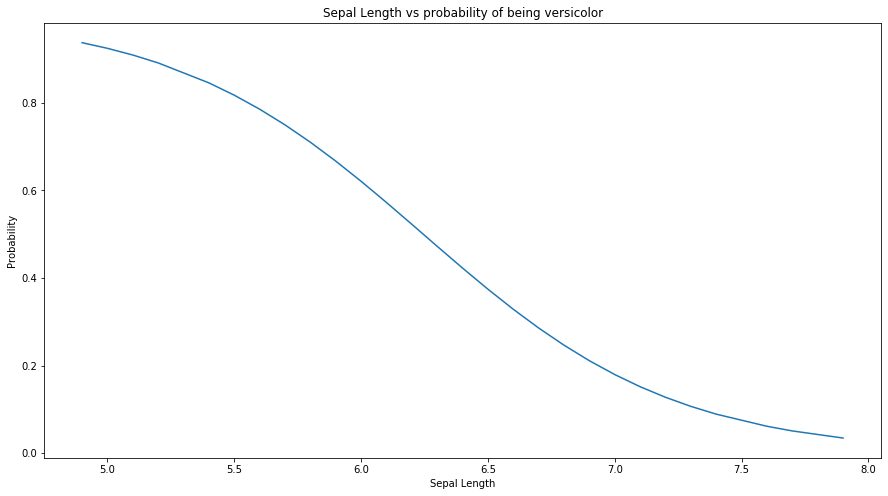

In [24]:
import scipy

new_mod_res=sm.Logit(Y,sm.add_constant(filt_data['sepal_length'].values)).fit()


def invlogit(x): # this is to transform things back from the logit scale to a probability scale
    result=scipy.special.expit(x)
    return(result)
def calc_se(model,X): # this is to get the standard error of the predictions
    c=model.cov_params() # get covariance
    vcov = np.dot(X, np.dot(c, X.T)) # populate the covariance matrix, given by X * Cov * transpose of X
    se = np.sqrt(np.diag(vcov)) # se is the square root of the diagonals of this matrix
    return(se) # don't worry too much about the math :) 

# get all of our information

sepal_x=sm.add_constant(filt_data['sepal_length'].values)
pred_prob=new_mod_res.predict()
se=calc_se(model=new_mod_res,X=sepal_x)
# create our sorting df so we can visualise the relationship between variables

df_to_sort=pd.DataFrame({"sepal_length":sepal_x[:,1],"prob":pred_prob,
                         "upr":invlogit(new_mod_res.fittedvalues+(1.96*se)),
                        "lwr":invlogit(new_mod_res.fittedvalues-(1.96*se))})


sorted_df=df_to_sort.sort_values(by=['sepal_length'])
# now we can visualise everything 


plt.figure(figsize=(15,8))

plt.title('Sepal Length vs probability of being versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Probability')
_=plt.plot('sepal_length','prob',data=sorted_df)

    


This is pretty cool! We can now see the relationship between probability of being a certain species of flower and sepal length. What about how certain the model is? We can try baking that into our plot too using the standard errors we calculated for the predictions and draw a prediction interval. 



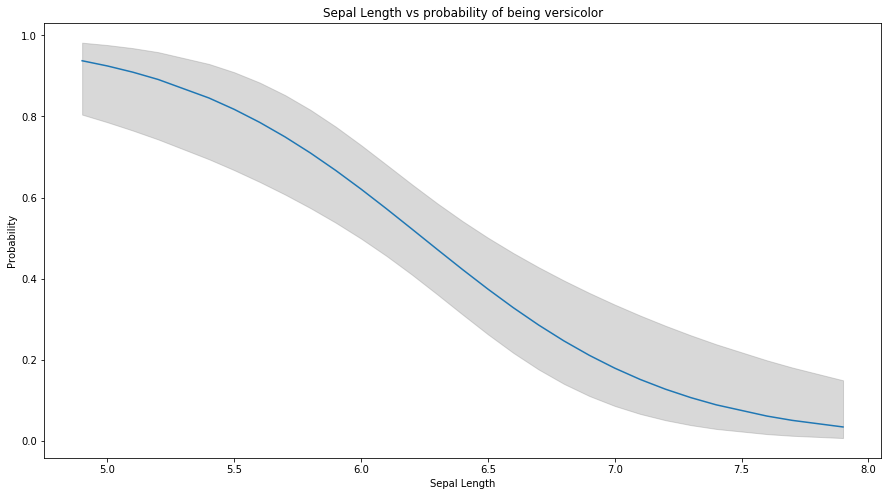

In [25]:
plt.figure(figsize=(15,8))

plt.title('Sepal Length vs probability of being versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Probability')
plt.plot('sepal_length','prob',data=sorted_df)
_=plt.fill_between('sepal_length','upr','lwr',data=sorted_df,color='gray',alpha=0.3)

Now we can really visualise the relationship between different variables and how they effect the outcome in the model! We can do the same kind of visualisation for the other variables using different fitted models too. Here is a really good example of trying to functionise different operations to save some time. 

In [26]:
def make_model_pred_table(variable_to_plot,Y,name):

    X=sm.add_constant(variable_to_plot)
    model=sm.Logit(Y,X).fit()


# get all of our information

    pred_prob=model.predict()
    se=calc_se(model=model,X=X)
# create our sorting df so we can visualise the relationship between variables

    df_to_sort=pd.DataFrame({f"{name}":X[:,1],"prob":pred_prob,
                         "upr":invlogit(model.fittedvalues+(1.96*se)),
                        "lwr":invlogit(model.fittedvalues-(1.96*se))})


    sorted_df=df_to_sort.sort_values(by=[f'{name}'])
    return(sorted_df)


sepal_length_df=make_model_pred_table(filt_data['sepal_length'].values,Y=Y,name='sepal_length')
sepal_width_df=make_model_pred_table(filt_data['sepal_width'].values,Y=Y,name='sepal_width')
petal_length_df=make_model_pred_table(filt_data['petal_length'].values,Y=Y,name='petal_length')
petal_width_df=make_model_pred_table(filt_data['petal_width'].values,Y=Y,name='petal_width')



Optimization terminated successfully.
         Current function value: 0.552733
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.642904
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.167160
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.167104
         Iterations 9


Now we can plot using our newly created dataframes.

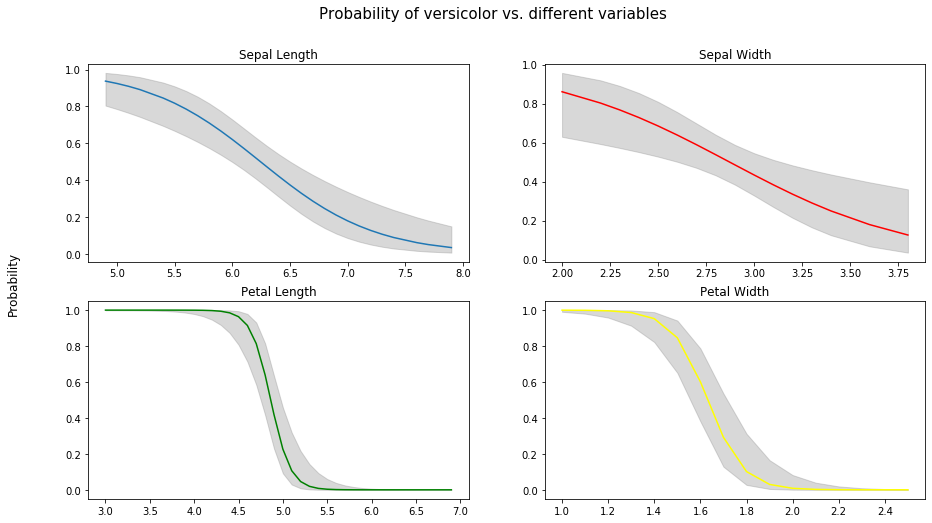

In [27]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,8))


ax1.plot('sepal_length','prob',data=sepal_length_df)
ax1.fill_between('sepal_length','upr','lwr',data=sepal_length_df,color='gray',alpha=0.3)
ax1.set_title('Sepal Length')

ax2.plot('sepal_width','prob',data=sepal_width_df,c='red')
ax2.fill_between('sepal_width','upr','lwr',data=sepal_width_df,color='gray',alpha=0.3)
ax2.set_title('Sepal Width')

ax3.plot('petal_length','prob',data=petal_length_df,c='green')
ax3.fill_between('petal_length','upr','lwr',data=petal_length_df,color='gray',alpha=0.3)
ax3.set_title('Petal Length')

ax4.plot('petal_width','prob',data=petal_width_df,c='yellow')
ax4.fill_between('petal_width','upr','lwr',data=petal_width_df,color='gray',alpha=0.3)
ax4.set_title('Petal Width')


fig.text(0.05, 0.5, 'Probability', va='center', rotation='vertical',fontsize=12)
_=fig.suptitle('Probability of versicolor vs. different variables',fontsize=15)

Based on this plot, and also from the summary statistics we recovered from the first overall model, the 2 petal statistics appear to be more informative for discrimination between versicolor and virginica plant species. We can see the logistic curves for both of these variables is much steeper, meaning the model is surer of the distinction between species as each respective variable increases. One of the very nice things about logistic regression is that you can visualise these kidn of relationships better than you can with other models. 

### Bonus

Below is some code for looking at a lineplot of the uncertainty around the first model predicitions, in case we were wondering how the uncertainty related to the model that used all variables. 

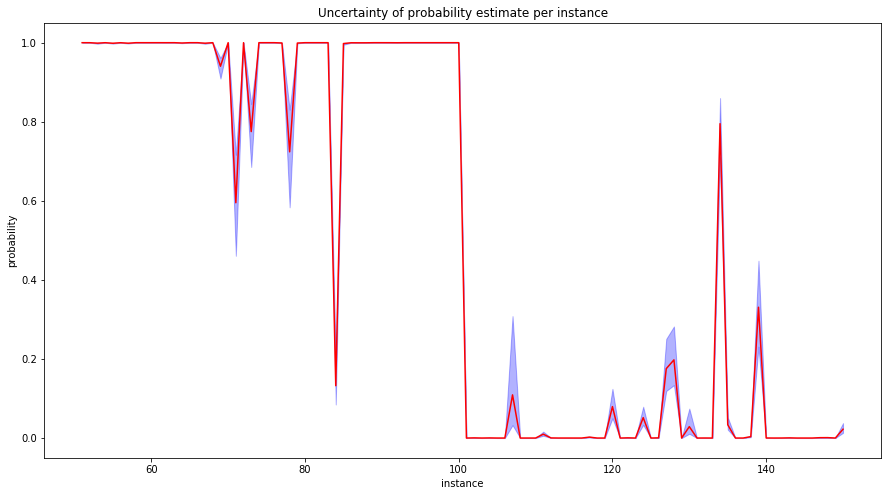

In [28]:
plt.figure(figsize=(15,8))
plt.plot(range(51,151),invlogit(res.fittedvalues),c='red')
plt.fill_between(range(51,151),(invlogit(res.fittedvalues-(1.96*se))),(invlogit(res.fittedvalues+(1.96*se))),
                color='b',alpha=0.3)
plt.title('Uncertainty of probability estimate per instance')
plt.xlabel('instance')
_=plt.ylabel('probability')

### Model prediction and validation

Let's try to get a bit more sophisticated with our model. We ideally want to be able to predict new data based on the training of our other model. So let's try and use the full model trained on a subset to predict the rest of the data. For this we need to generate some random numbers to index our arrays.

In [30]:
np.random.seed(42)
rand_nums=np.random.choice(100,60,replace=False)
keep_nums=[]
for i in range(100):
    if i in rand_nums:
        pass
    else:
        keep_nums.append(i)
train_set=filt_data.iloc()[rand_nums]
test_set=filt_data.iloc()[keep_nums]

print(train_set.shape)
print(test_set.shape)
train_set=sm.add_constant(train_set)
test_set=sm.add_constant(test_set)
train_set.head()

(60, 5)
(40, 5)


,const,sepal_length,sepal_width,petal_length,petal_width,species
133,1.0,6.3,2.8,5.1,1.5,0
103,1.0,6.3,2.9,5.6,1.8,0
120,1.0,6.9,3.2,5.7,2.3,0
95,1.0,5.7,3.0,4.2,1.2,1
94,1.0,5.6,2.7,4.2,1.3,1


Now we have a **training** and a **test set**. The significance of these concepts lies in the ultimate goal of the model - we do not want it to just learn a training set perfectly, but instead generalise to new data and have usefulness in a predictive sense. With that in mind, let's train our model and then see how it generalises to our test set on a range of metrics.

In [31]:
train_model=sm.Logit(np.array(train_set['species'].values.astype('int')),train_set.drop(['species'],axis=1))
train_model=train_model.fit()

train_model.summary()

Optimization terminated successfully.
         Current function value: 0.081194
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 May 2020   Pseudo R-squ.:                  0.8780
Time:                        15:10:45   Log-Likelihood:                -4.8717
converged:                       True   LL-Null:                       -39.940
Covariance Type:            nonrobust   LLR p-value:                 2.123e-14
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.4798     28.491      1.140      0.254     -23.361      88.321
sepal_length     2.8614      3.440      0.832      0.406      -3.882       9.604
sepal_width      3.8453      3.765      1.021      0.307      -3.534      11.225
petal_length    -7.0347      5.292     -1.329      0.184     -17.407       3.337
petal_width    -16.1161      7.984     -2.019      0.044     -31.764      -0.469
================================================================================

Possibly complete quasi-separation: A fraction 0.42 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

This looks pretty good - we can see the parameters look pretty similar in our training set model. Let's try predicting some new outcomes. 

In [32]:
prediction_test=train_model.predict(test_set.drop(['species'],axis=1)).values

# get back the accuracy
classification_vec=[]
threshold=0.5
for i in range(len(prediction_test)):
    
    if prediction_test[i] > threshold:
        
        classification_vec.append(1)
    
    else:
        
        classification_vec.append(0)
count_corr=0
for i in range(len(classification_vec)):
    
    if classification_vec[i]==test_set['species'].values[i]:
        count_corr+=1
print(f'Accuracy = {count_corr/len(classification_vec) * 100}%')

Accuracy = 97.5%


That is pretty great! Let's see how it looks plotted on a ROC curve (you have probably seen these in papers before). They visualise the trade off between sensitivity and specificity, which are the true positive rate and true negative rate respectively. We can use `sklearn` for this. 

In [37]:
?RocCurveDisplay

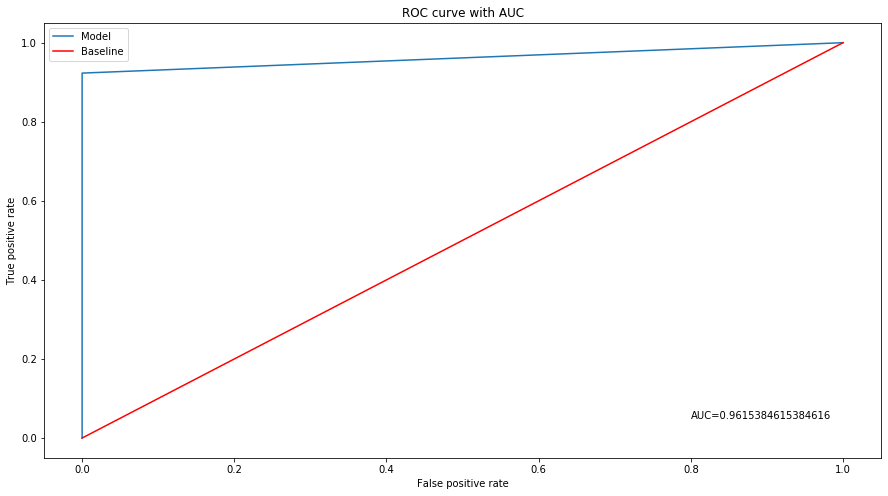

In [182]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(np.array(test_set['species'].values).astype('int'), classification_vec) # create tpr fpr
# which corresponds to the true positive rate and the false positive rate. first arg is y_true, second y_pred

# get the AUC, which is the area under this curve. The higher, the better. 

auc_lr=auc(fpr,tpr)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Model')
plt.plot([0,1],c='red',label='Baseline')
plt.legend()
plt.text(x=0.8,y=0.05,s=f'AUC={auc_lr}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_=plt.title('ROC curve with AUC')


Overall, this appears to be a pretty good model. There are a myriad of different metrics we could have used as well, such as the percentage of true positives versus true negatives. While a model has performed well on one set of metrics that is no guarantee it will generalise well to other situations and more new data - you should ideally check as many metrics for performance as possible. Let's exxamine our amazing performance a little closer:  

In [52]:
# let's see how many examples of each case were in the training and test sets

case_count=0

for i in train_set['species'].values:
    if i == 1:
        case_count+=1
train_n=len(train_set['species'])
print(f'Cases in training set={case_count}')
print(f'Controls in training set={train_n - case_count}')

print(f'Case Proportion={case_count/train_n * 100}%')



case_count_test=0

for i in test_set['species'].values:
    if i == 1:
        case_count_test+=1
test_n=len(test_set['species'])
print(f'Cases in test set={case_count_test}')
print(f'Controls in test set={test_n - case_count_test}')

print(f'Case Proportion={case_count_test/train_n * 100}%')


Cases in training set=37
Controls in training set=23
Case Proportion=61.66666666666667%
Cases in test set=13
Controls in test set=27
Case Proportion=21.666666666666668%


What do you think of this proportional split? Would you say the model had an even playing field here? The small case proportion in the testing set is pretty worrying - a naive model that just classifies everything as not versicolor would have achieved about 79 percent accuracy on the test set - making the 97 percent accuracy classification a little less impressive. This is very important to bear in mind when creating and testing models, as you won't always have a clean seperation with your random training and testing split. There are plenty of other methods to try and ensure there is roughly a 50/50 split in cases and controls between training and test sets. However, in favour of the model performing very well, we can look at the individual class accuracies below: 

In [66]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(np.array(test_set['species'].values).astype('int'),classification_vec).flatten()



# accuracy for positives 

print(f'Accuracy on cases={tp/(tp+fp)*100}')

# because there is none! 

print(f'Accuracy on controls={tn / (tn + fn)*100}')

Accuracy on cases=100.0
Accuracy on controls=96.42857142857143


Maybe it's just a great model :)

### Other models

As you may have noticed, this notebook is already very long. I will only cover one more model - a relatively simple one - in the interest of brevity. As you can see. statistical modelling / machine learning is not trivial, requiring careful consideration of your model parameters and scrutiny in interpretation. Hopefully by the end of this notebook you will have an appreciation for what kind of questions you need to ask, or at least you have a feel for how you should think critically about your models. 

## K-nearest neighbours 

Consider a 2 dimensional cluster of points, as presented below for our iris dataset.  

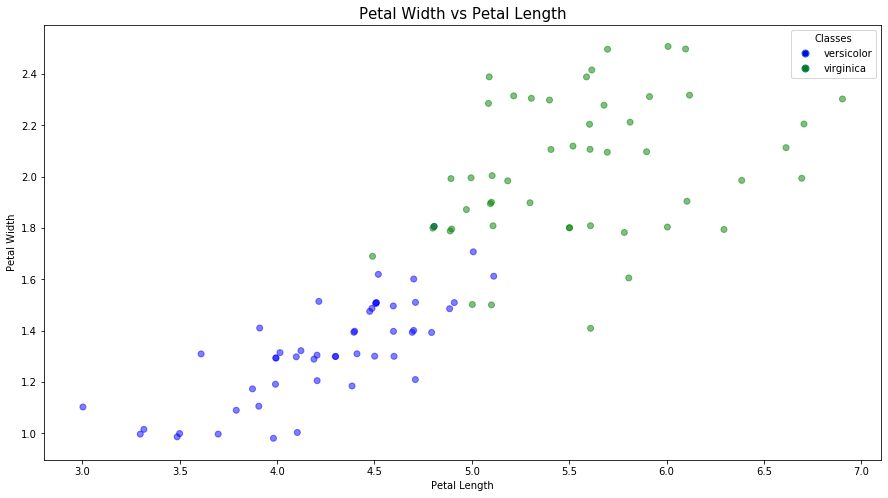

In [87]:
# just the code from before repurposed 
colours=[]
for i in filt_data['species']:
    if i==1:
        colours.append('blue')
    else:
        colours.append('green')
        
# create plot         
fig,ax=plt.subplots(figsize=(15,8))

noise=np.random.normal(0,0.01,[100]) # for jitter 

sc=ax.scatter(filt_data['petal_length'].values+noise,
              filt_data['petal_width'].values+noise,c=colours,alpha=0.5)
# create legend 
legend_item=[Line2D([0], [0], marker='o', label='versicolor', linestyle='None',
                          markerfacecolor='blue', markersize=7),
            Line2D([0], [0], marker='o', label='virginica', linestyle='None',
                          markerfacecolor='green', markersize=7)]
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.legend(handles=legend_item,
                       loc='upper right',title='Classes',fontsize=10)
_=ax.set_title('Petal Width vs Petal Length',fontsize=15)
            

We can see there are 2 clusters of points broadly. The intuition behind K-nearest neighbour models is that similar points will cluster together - this roughly means data in one class are more similar to each other than they are to data in other classes. K-nearest neighbours uses this assumption and gets a metric of similarity between all points to each other - from there it builds a descision boundary based on an arbitrary number of close data point lables.  This can then be used to classify new points as one class or another, depending on the class of their nearest neighbours - ie if $K=3$, the algorithm will take the consensus vote from the 3 nearest neighbours to that point. We can set K to be whatever we want too - the lower K is, the less robust it may be to possibly incorrectly labelled data or noise of any kind. In this sense there isn't so much any model fitting as there is computation of distance and sorting of the distance vector. Let's try it in 2 dimensions:

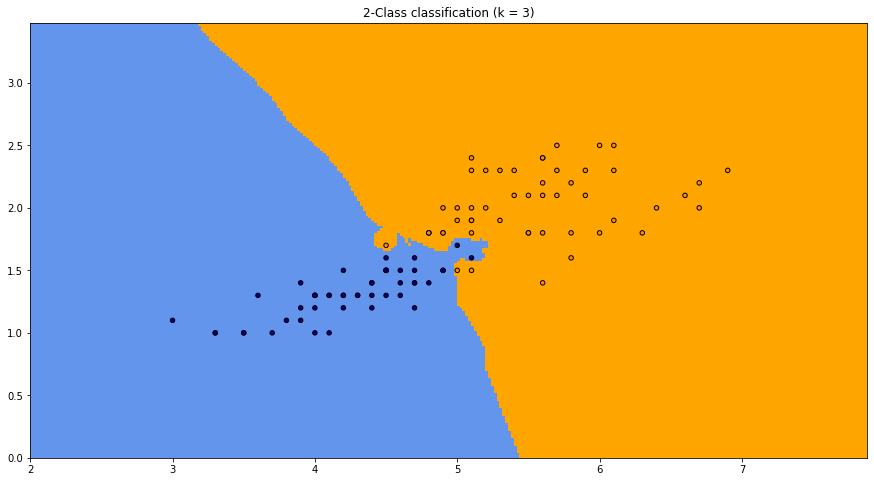

In [96]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

X = filt_data.drop(['species'],axis=1).iloc[:,-2:].values
y = np.array(filt_data['species'].values).astype('int')

h = .02  # step size in the mesh, for resolution

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') # this is our model
knn.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2-Class classification (k = {n_neighbors})")

plt.show()

This is pretty cool! Let's evaluate our predictive performance using the train and test data we had before.... 

In [106]:

knn = neighbors.KNeighborsClassifier(3, weights='distance') 
knn.fit(train_set.drop(['species'],axis=1),train_set['species'].astype('int'))

class_vec_knn=knn.predict(test_set.drop(['species'],axis=1))

from sklearn.metrics import accuracy_score # just a shorter way than we had done 
acc_knn=accuracy_score(test_set['species'].values.astype('int'),class_vec_knn)
print(f'Accuracy = {acc_knn * 100}%')

Accuracy = 95.0%


What if we tried to use the consensus vote from 2 neighbours instead? 



In [107]:
knn = neighbors.KNeighborsClassifier(2, weights='distance') 
knn.fit(train_set.drop(['species'],axis=1),train_set['species'].astype('int'))

class_vec_knn=knn.predict(test_set.drop(['species'],axis=1))

from sklearn.metrics import accuracy_score 
acc_knn=accuracy_score(test_set['species'].values.astype('int'),class_vec_knn)
print(f'Accuracy = {acc_knn * 100}%')

Accuracy = 90.0%


That is interesting. Let's try to iterate over the possible K's and plot the result. 

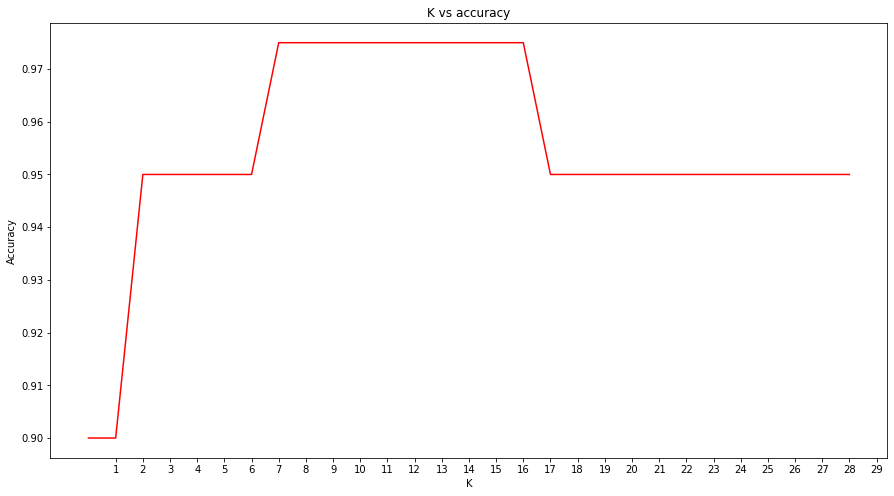

In [112]:
accuracies=[]
from sklearn.metrics import accuracy_score
for k in range(1,30):
    knn = neighbors.KNeighborsClassifier(k, weights='distance') 
    knn.fit(train_set.drop(['species'],axis=1),train_set['species'].astype('int'))

    class_vec_knn=knn.predict(test_set.drop(['species'],axis=1))

     
    acc_knn=accuracy_score(test_set['species'].values.astype('int'),class_vec_knn)
    accuracies.append(acc_knn)
plt.figure(figsize=(15,8))
plt.plot(accuracies,c='red')
plt.title('K vs accuracy')
plt.xlabel('K')
plt.xticks(range(1,30))
_=plt.ylabel('Accuracy')

This is also pretty cool - it tells us how the model changes based on how many neighbours it uses for a consensus vote. Unfortunately we can't do much else apart from this due to the simplicity of this algorithm. We can compare this to logistic regression on a ROC curve however:

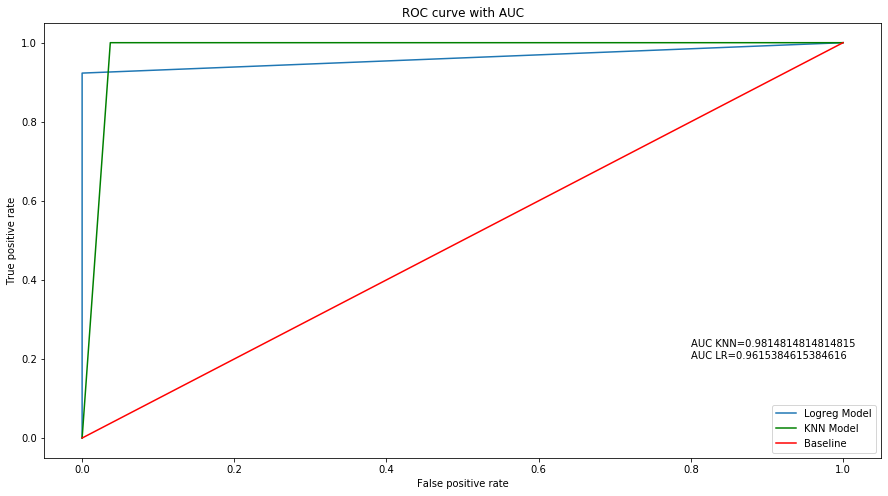

In [190]:
knn = neighbors.KNeighborsClassifier(10, weights='distance') 
knn.fit(train_set.drop(['species'],axis=1),train_set['species'].astype('int'))

class_vec_knn=knn.predict(test_set.drop(['species'],axis=1))

fpr_knn, tpr_knn, _ = roc_curve(np.array(test_set['species'].values).astype('int'), class_vec_knn) 

# get the AUC, which is the area under this curve. The higher, the better. 

auc_knn=auc(fpr_knn,tpr_knn)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Logreg Model')
plt.plot(fpr_knn,tpr_knn,c='green',label='KNN Model')
plt.plot([0,1],c='red',label='Baseline')
plt.legend()
plt.text(x=0.8,y=0.2,s=f'AUC LR={auc_lr}')
plt.text(x=0.8,y=0.23,s=f'AUC KNN={auc_knn}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_=plt.title('ROC curve with AUC')


The models look pretty similar!

### Conclusion

To conclude, you have learned an awful lot of information here in a very short time - don't worry if you don't understand everything at once because people do this for years and still don't understand everything perfectly. The worksheet will hopefully be a pretty gentle challenge but nothing too hectic. Thanks for reading! 



### A few points to note 

This tutorial was a hard and fast introduction to one form of clustering and 2 different models. One of the biggest things missing from this introduction is how comprehensive you have to be in your data exploration before fitting any models. We were working with the iris dataset here which we have looked at multiple times over the last few weeks so that has been fine - for the data you will recieve in your tutorial there will be a few notable differences. You will probably not be all too familiar with the data presented and whill have to visualise various features before making decisions - the range of values in the iris dataset also didn't warrant any kind of scaling, but you will likely have to apply some standardisation or normalisation for the tutorial dataset. **Bear in mind, if you standardise your variables before fitting, you can say the same thing, but recognise that it will mean something different. ie - if you standardised sepal length, and got an odds ratio of 10, you could say that for a unit increase in *standardised* sepal length, your chance of being versicolor increase by 10. That may not directly mean an extra 1 cm in sepal length leads to this, so you will have to find out how many non standardised units are captured by a standardised unit increase**.  
You will also have noticed that there were no categorical predictor variables - ie something other than continuous. Logistic regression can handle this fine normally (you will just need to be careful in your interpretation) but KNN will not work as well, partly due to the fact that at least with the default settings it relies upon a distance metric that is not robust to categorical variables - ie it will literally treat your column like integers, 0s and 1s as opposed to different categories which is not what you want. As such you will need to consider this in the worksheet! 

One final and very important thing - we haven't covered how to deal with missing values. Below I have attached a little pseudocode for one way of dealing with this (**as well as another way for training and test splitting**). 


For further reading on any of these topics: 

[PCA](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

[Logistic Regression](https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression)

[KNN](https://www.youtube.com/watch?v=HVXime0nQeI)

[Interpreting coefficients](https://medium.com/ro-data-team-blog/interpret-the-impact-size-with-logistic-regression-coefficients-5eec21baaac8)

In [161]:
## missing values 

# generate data 

example_x_missing=[1,2,3,3,3,2,3,5,np.nan] # nan is not a number 

# now we can ask if there are any missing values 
print(np.any(np.isnan(np.array(example_x_missing))))
# we ask here if there is any element that is nan

# say we wanted to make sure everything was finite 

example_finite=[1,2,3,4,3,4,np.inf]

print(np.all(np.isfinite(np.array(example_finite))))
#we ask here if all elements are finite


# say we know this and we want to do a replacement 

print(np.nan_to_num(example_x_missing)) # replace with zero 
print(np.nan_to_num(example_finite)) # replace with really big number 

# or try to convert to say the mean - use nanmean to ignore the nan

for i in range(len(example_x_missing)):
    if np.isnan(example_x_missing[i]):
        example_x_missing[i]=np.nanmean(example_x_missing)
        
print(example_x_missing)


True
False
[1. 2. 3. 3. 3. 2. 3. 5. 0.]
[1.00000000e+000 2.00000000e+000 3.00000000e+000 4.00000000e+000
 3.00000000e+000 4.00000000e+000 1.79769313e+308]
[1, 2, 3, 3, 3, 2, 3, 5, 2.75]


In [176]:
# another note - you can also use train test split as specified here 
from sklearn.model_selection import train_test_split
x_split=filt_data.drop(['species'],axis=1)
y_split=filt_data.species.values
x_train,x_test,y_train,y_test=train_test_split(x_split,
                                               y_split,
                                               test_size=0.4,random_state=30)

x_train=sm.add_constant(x_train)

sm.Logit(y_train,x_train).fit().summary()

Optimization terminated successfully.
         Current function value: 0.073609
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            4
Date:                Sun, 17 May 2020   Pseudo R-squ.:                  0.8930
Time:                        14:22:39   Log-Likelihood:                -4.4165
converged:                       True   LL-Null:                       -41.288
Covariance Type:            nonrobust   LLR p-value:                 3.674e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.7101     24.039      1.569      0.117      -9.406      84.826
sepal_length     3.2909      2.841      1.158      0.247      -2.278       8.859
sepal_width      2.2226      5.751      0.386      0.699      -9.049      13.494
petal_length    -8.3156      4.256     -1.954      0.051     -16.657       0.026
petal_width    -14.1845      7.568     -1.874      0.061     -29.018       0.649
================================================================================

Possibly complete quasi-separation: A fraction 0.42 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""